# 8 задание

In [133]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [150]:
data = pd.read_excel("FLATS.xlsx", sheet_name='Лист1')
data

,Id,SQUARE_METERS,METRO_DISTANCE,PRICE
0,601,28,677,7328400
1,602,54,120,9754600
2,603,43,1344,6781500
3,604,33,1003,6784100
4,605,30,591,7296200
5,606,45,719,8121900
6,607,55,406,8889400
7,608,63,216,9819000
8,609,27,2497,3924500
9,610,63,431,9642200


# 8.1

In [12]:
from sklearn.linear_model import LinearRegression

In [187]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)

ID = 680

y = data[data['Id'] <= ID]['PRICE']
#y = pd.DataFrame(y, columns=['PRICE'])
X = data[data['Id'] <= ID]['SQUARE_METERS']
X = pd.DataFrame(X, columns=['SQUARE_METERS'])

y0 = data[data['Id'] > ID]['PRICE']
X0 = data[data['Id'] > ID]['SQUARE_METERS']

In [188]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [189]:
print(model.score(X, y))

0.41693081920425074


In [190]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,4.409362e+06
1,SQUARE_METERS,5.903356e+04


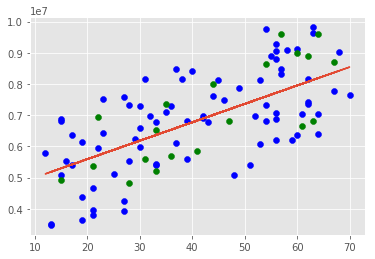

In [191]:
plt.scatter(X, y, color='blue')
plt.scatter(X0,y0,color='green')
plt.plot(X, model.predict(X))
plt.show()

In [192]:
sum = 0
for i in range(700 - ID):
    sum += abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))
print('MAE:\t', sum / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))**2
print('RMSE:\t', math.sqrt(sum / (700 - ID)))
sum = 0
for i in range(700 - ID):
    sum += ((y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_)) / y0.tolist()[i])
print('MPE:\t', (sum * 100) / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_)) / y0.tolist()[i])
print('MAPE:\t', (sum * 100) / (700 - ID))

y_ = 0
for i in range(700 - ID):
    y_ += y0.tolist()[i] / (700 - ID)

sum = 0
for i in range(700 - ID):
    sum += abs(float(model.intercept_ + X0.tolist()[i] * model.coef_) - y_)
print('AD:\t', sum)
print('MAD:\t', sum / (700 - ID))
sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (float(model.intercept_ + X0.tolist()[i] * model.coef_) - y_)**2
    sum2 += (y0.tolist()[i] - y_)**2
print('R^2:\t', sum1 / sum2)

sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))**2
    sum2 += y0.tolist()[i] ** 2 + float(model.intercept_ + X0.tolist()[i] * model.coef_) ** 2
print('v:\t', math.sqrt(sum1 / sum2))

MAE:	 917220.271576626
RMSE:	 1013264.9508317051
MPE:	 -1.6990847072514879
MAPE:	 13.22555367422856
AD:	 16848364.201296136
MAD:	 842418.2100648067
R^2:	 0.3711453228298224
v:	 0.10041442874881787


# 8.2

In [193]:
X = data[data['Id'] <= ID]['METRO_DISTANCE']
X = pd.DataFrame(X, columns=['METRO_DISTANCE'])
X0 = data[data['Id'] > ID]['METRO_DISTANCE']
X.head()

,METRO_DISTANCE
0,677
1,120
2,1344
3,1003
4,591


In [194]:
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))

0.5733566320010377


In [195]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,8.887660e+06
1,METRO_DISTANCE,-1.619482e+03


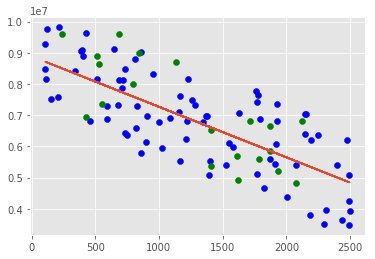

In [196]:
plt.scatter(X, y, color='blue')
plt.scatter(X0,y0,color='green')
plt.plot(X, model.predict(X))
plt.show()

In [197]:
sum = 0
for i in range(700 - ID):
    sum += abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))
print('MAE:\t', sum / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))**2
print('RMSE:\t', math.sqrt(sum / (700 - ID)))
sum = 0
for i in range(700 - ID):
    sum += ((y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_)) / y0.tolist()[i])
print('MPE:\t', (sum * 100) / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_)) / y0.tolist()[i])
print('MAPE:\t', (sum * 100) / (700 - ID))

y_ = 0
for i in range(700 - ID):
    y_ += y0.tolist()[i] / (700 - ID)

sum = 0
for i in range(700 - ID):
    sum += abs(float(model.intercept_ + X0.tolist()[i] * model.coef_) - y_)
print('AD:\t', sum)
print('MAD:\t', sum / (700 - ID))
sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (float(model.intercept_ + X0.tolist()[i] * model.coef_) - y_)**2
    sum2 += (y0.tolist()[i] - y_)**2
print('R^2:\t', sum1 / sum2)

sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_))**2
    sum2 += y0.tolist()[i] ** 2 + float(model.intercept_ + X0.tolist()[i] * model.coef_) ** 2
print('v:\t', math.sqrt(sum1 / sum2))

MAE:	 878006.7950994845
RMSE:	 1007014.3832666214
MPE:	 0.4006033828440989
MAPE:	 12.530529334667639
AD:	 18519433.654297765
MAD:	 925971.6827148882
R^2:	 0.42206751765798617
v:	 0.10069263602017561


# 8.3

In [198]:
X = data[data['Id'] <= ID].drop('PRICE', axis=1)
X = pd.DataFrame(X, columns=['SQUARE_METERS','METRO_DISTANCE'])
X0 = data[data['Id'] > ID]['SQUARE_METERS']
X1 = data[data['Id'] > ID]['METRO_DISTANCE']

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
print(model.score(X, y))

0.9784676175677296


In [200]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [float(model.intercept_)] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,6.507125e+06
1,SQUARE_METERS,5.819511e+04
2,METRO_DISTANCE,-1.602822e+03


In [202]:
sum = 0
for i in range(700 - ID):
    sum += abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]))
print('MAE:\t', sum / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]))**2
print('RMSE:\t', math.sqrt(sum / (700 - ID)))
sum = 0
for i in range(700 - ID):
    sum += ((y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1])) / y0.tolist()[i])
print('MPE:\t', (sum * 100) / (700 - ID))
sum = 0
for i in range(700 - ID):
    sum += (abs(y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1])) / y0.tolist()[i])
print('MAPE:\t', (sum * 100) / (700 - ID))

y_ = 0
for i in range(700 - ID):
    y_ += y0.tolist()[i] / (700 - ID)

sum = 0
for i in range(700 - ID):
    sum += abs(float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]) - y_)
print('AD:\t', sum)
print('MAD:\t', sum / (700 - ID))
sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]) - y_)**2
    sum2 += (y0.tolist()[i] - y_)**2
print('R^2:\t', sum1 / sum2)

sum1 = 0
sum2 = 0
for i in range(700 - ID):
    sum1 += (y0.tolist()[i] - float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]))**2
    sum2 += y0.tolist()[i] ** 2 + float(model.intercept_ + X0.tolist()[i] * model.coef_[0] + X1.tolist()[i] * model.coef_[1]) ** 2
print('v:\t', math.sqrt(sum1 / sum2))

MAE:	 216681.4148194321
RMSE:	 255159.34839136893
MPE:	 0.027463951169889294
MAPE:	 3.019050537537395
AD:	 26330856.04629431
MAD:	 1316542.8023147155
R^2:	 0.9492332307708254
v:	 0.025035561507066786


In [79]:
#df = pd.DataFrame(zip(X0['METRO_DISTANCE'], y['PRICE']), columns=['Distance', 'Price'])
